In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

from sklearn.metrics import r2_score
from scipy.special import rel_entr

from biological_fuzzy_logic_networks.manuscripts_functions.colors import models_dict
from biological_fuzzy_logic_networks.manuscripts_functions.metrics import compute_scalar_mmd, wasserstein_distance

In [2]:
fontsize = 12

In [3]:
sns.set_theme(font="Arial", style="ticks", rc={"font.size": fontsize,"axes.titlesize":fontsize,"axes.labelsize":fontsize, 
                                               "xtick.labelsize": fontsize, "ytick.labelsize": fontsize, "legend.fontsize": fontsize})
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.size'] = fontsize


In [4]:
def compute_MMD(data):
    data["cell_id"] = len(data['marker'].unique())*[i for i in range(int(len(data)/len(data["marker"].unique())))] 
    
    pred = data[["cell_id", "marker", "pred"]]
    pred = pred.set_index("cell_id").pivot(columns="marker") 
    
    true = data[["cell_id", "marker", "true"]]
    true = true.set_index("cell_id").pivot(columns="marker")
    
    mmd = compute_scalar_mmd(true, pred)
    
    return mmd


def compute_wasserstein(data):
    data["cell_id"] = len(data['marker'].unique())*[i for i in range(int(len(data)/len(data["marker"].unique())))] 
    
    pred = data[["cell_id", "marker", "pred"]]
    pred = pred.set_index("cell_id").pivot(columns="marker")
    
    
    true = data[["cell_id", "marker", "true"]]
    true = true.set_index("cell_id").pivot(columns="marker")
    emd = wasserstein_distance(true, pred)
    
    return emd

def compute_R2(data):
    out = r2_score(data["true"], data['pred'])
    return out

In [5]:
base_dir = "/dccstor/ipc1/CAR/BFN/Model/MeasuredNodes/"
max_nodes = 13
n_repeats = 5
input_nodes = ["igf1", "il1a", "tgfa", "tnfa"]

In [6]:
all_data = []
n_sel_nodes = []
n_repeat = []
for i in range(max_nodes):
    for j in range(n_repeats):
        try:
            data = pd.read_csv(f"{base_dir}{i+1}_nodes/{j+1}_unperturbed.csv", index_col=1)
            all_data.append(data)
            n_sel_nodes = n_sel_nodes + [i+1]*len(data)
            n_repeat = n_repeat + [j+1]*len(data)
        except:
            print("Node ", i+1, "repeat", j+1, "missing")

In [7]:
res = pd.concat(all_data)
res["n_measured_nodes"] = n_sel_nodes
res["n_repeat"] = n_repeat
res = res.rename(columns={"Unnamed: 0": "model"})
res

,model,hsp27,igf1,il1a,tgfa,tnfa,mek12,erk12,mkk4,jnk12,ikk,ikb,ras,map3k7,pi3k,map3k1,akt,p38,n_measured_nodes,n_repeat
0,teacher_true,0.013427,0.548712,0.360482,0.688332,0.801802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,teacher_true,0.003596,0.207493,0.272927,0.663766,0.809130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,teacher_true,1.000000,0.976947,0.780968,0.446808,0.679310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3,teacher_true,0.988329,0.814578,0.651309,0.572902,0.330526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,teacher_true,0.000275,0.372405,0.307615,0.488768,0.294089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,lm_random_input,-0.008994,NaN,NaN,NaN,NaN,0.261993,0.162388,0.056768,0.033114,0.322289,0.324758,0.287363,0.299506,0.835128,0.191747,0.858924,0.012911,13,5
1996,lm_random_input,0.405719,NaN,NaN,NaN,NaN,-0.094317,-0.217236,0.453756,0.456485,0.789932,0.811605,-0.033432,0.768178,0.851228,0.485644,0.873985,0.437112,13,5
1997,lm_random_input,0.714251,NaN,NaN,NaN,NaN,0.806830,0.749844,0.740874,0.736054,0.744177,0.748946,0.779182,0.657356,0.950556,0.822751,0.971062,0.699477,13,5
1998,lm_random_input,0.536857,NaN,NaN,NaN,NaN,0.892241,0.843375,0.542482,0.540243,0.741237,0.752908,0.855673,0.697410,0.909632,0.598865,0.921347,0.516489,13,5


In [8]:
true = res.loc[res["model"]=="teacher_true", [c for c in res.columns if not c in input_nodes]]
pred = res.loc[res["model"]!="teacher_true", [c for c in res.columns if not c in input_nodes]]

In [9]:
true_long = true.reset_index().melt(id_vars = ["index", "n_measured_nodes", "n_repeat"], var_name="marker", value_name="true")
pred_long = pred.reset_index().melt(id_vars = ["index", "model", "n_measured_nodes", "n_repeat"], var_name="marker", value_name="pred")


In [10]:
all_long =  pred_long.merge(true_long, on=["index", "n_measured_nodes", 'n_repeat', "marker"], how="left")
all_long = all_long.dropna(axis=0, how="any")
all_long["true"] = all_long["true"].astype(float)

In [11]:
all_long["sq_err"] = (all_long["true"] - all_long["pred"])**2

In [12]:
all_per_run = all_long[["model", "n_measured_nodes", 'n_repeat', "marker", "sq_err"]].groupby(["model", "n_measured_nodes", 'n_repeat', "marker"]).mean()

In [13]:
all_per_run = all_per_run.rename(columns={"sq_err": "MSE"})

In [14]:
all_per_run["R2"] = all_long.groupby(["model", "n_measured_nodes", "n_repeat", "marker"]).apply(compute_R2)

In [15]:
all_per_run = all_per_run.reset_index()

In [16]:
per_run_network = all_per_run.groupby(["n_measured_nodes", "n_repeat", "model"]).mean(numeric_only=True)
per_run_network = per_run_network.rename(columns={"MSE": "Network MSE", "R2": "Network R2"})
per_run_network

Network MSE  Network R2
n_measured_nodes n_repeat model                                          
1                1        lm_random_input            0.403019   -0.736033
                          lm_same_input              0.052574    0.773533
                          student_random_input       0.449141   -0.934706
                          student_same_input         0.000056    0.999757
                          untrained_random_input     0.424498   -0.828555
...                                                       ...         ...
13               5        lm_same_input              0.025664    0.795957
                          student_random_input       0.298384   -1.018175
                          student_same_input         0.000004    0.999962
                          untrained_random_input     0.278939   -0.961342
                          untrained_same_input       0.015815    0.887081

[390 rows x 2 columns]

In [17]:
all_long.groupby(["n_measured_nodes", "n_repeat", "model"]).size()

n_measured_nodes  n_repeat  model                 
1                 1         lm_random_input            2000
                            lm_same_input              2000
                            student_random_input       2000
                            student_same_input         2000
                            untrained_random_input     2000
                                                      ...  
13                5         lm_same_input             26000
                            student_random_input      26000
                            student_same_input        26000
                            untrained_random_input    26000
                            untrained_same_input      26000
Length: 390, dtype: int64

In [18]:
all_long

,index,model,n_measured_nodes,n_repeat,marker,pred,true,sq_err
0,0,student_same_input,1,1,hsp27,0.004836,0.013427,7.380814e-05
1,1,student_same_input,1,1,hsp27,0.001646,0.003596,3.805922e-06
2,2,student_same_input,1,1,hsp27,0.999999,1.000000,2.928673e-14
3,3,student_same_input,1,1,hsp27,0.993466,0.988329,2.639191e-05
4,4,student_same_input,1,1,hsp27,0.000408,0.000275,1.747223e-08
...,...,...,...,...,...,...,...,...
10139995,1995,lm_random_input,13,5,p38,0.012911,0.601254,3.461470e-01
10139996,1996,lm_random_input,13,5,p38,0.437112,0.000013,1.910559e-01
10139997,1997,lm_random_input,13,5,p38,0.699477,0.000057,4.891882e-01
10139998,1998,lm_random_input,13,5,p38,0.516489,0.041425,2.256855e-01


In [19]:
per_run_network["MMD"] = all_long.groupby(["n_measured_nodes", "n_repeat", "model"]).apply(compute_MMD)
per_run_network["EMD"] = all_long.groupby(["n_measured_nodes", "n_repeat", "model"]).apply(compute_wasserstein)

2024-07-05 06:37:32.710919: W external/xla/xla/service/gpu/nvptx_compiler.cc:679] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [30]:
per_run_network["EMD"] = per_run_network["EMD"].astype(float)
per_run_network = per_run_network.reset_index()

# Same inputs

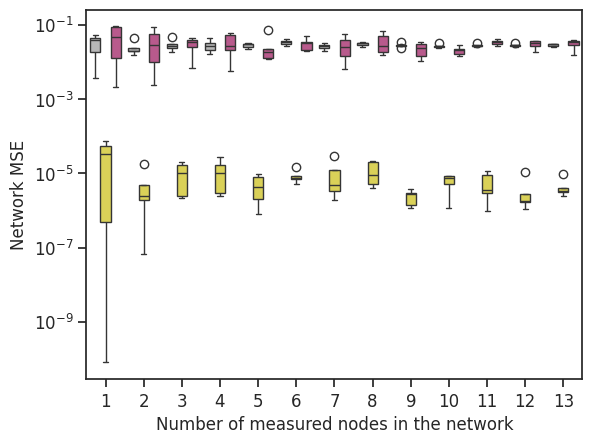

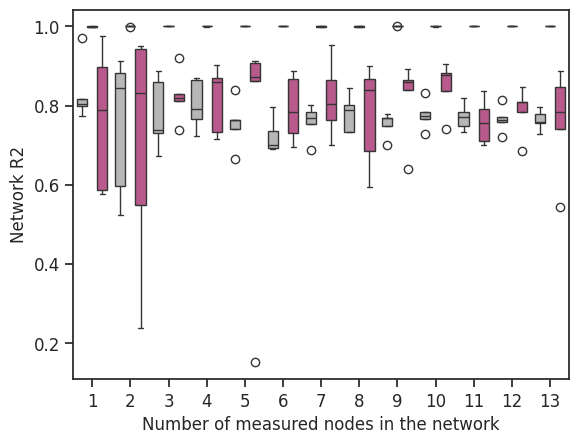

In [33]:
sns.boxplot(data=per_run_network[per_run_network["model"].isin(["untrained_same_input", "student_same_input", "lm_same_input"])], 
            x="n_measured_nodes", y="Network MSE", hue="model", palette=models_dict)
plt.legend([], [], frameon=False)
plt.xlabel("Number of measured nodes in the network")
plt.ylabel("Network MSE")
plt.yscale("log")
plt.savefig(f"/dccstor/ipc1/CAR/BFN/Figures/Measured_nodes_Network_MSE_same_inputs_per_n_measured.pdf", bbox_inches="tight")
plt.show()

sns.boxplot(data=per_run_network[per_run_network["model"].isin(["untrained_same_input", "student_same_input", "lm_same_input"])], 
            x="n_measured_nodes", y="Network R2", hue="model", palette=models_dict)
# plt.ylim((-3e4, 2))
plt.xlabel("Number of measured nodes in the network")
# plt.yscale("log")
plt.legend([], [], frameon=False)
plt.savefig(f"/dccstor/ipc1/CAR/BFN/Figures/Measured_nodes_Network_R2_same_inputs_per_n_measured.pdf", bbox_inches="tight")
plt.show()


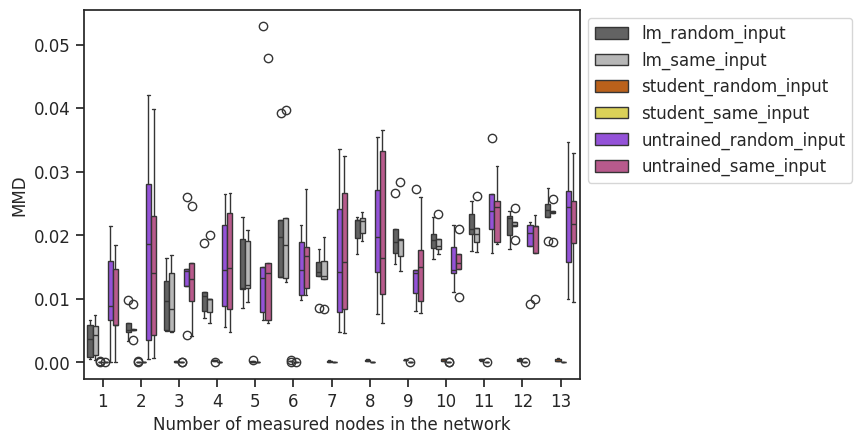

/tmp/ipykernel_3450975/3772577673.py:13: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(f"/dccstor/ipc1/CAR/BFN/Figures/Measured_nodes_MMD_per_n_measured.pdf", bbox_inches="tight")
/tmp/ipykernel_3450975/3772577673.py:13: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(f"/dccstor/ipc1/CAR/BFN/Figures/Measured_nodes_MMD_per_n_measured.pdf", bbox_inches="tight")
/tmp/ipykernel_3450975/3772577673.py:13: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(f"/dccstor/ipc1/CAR/BFN/Figures/Measured_nodes_MMD_per_n_measured.pdf", b

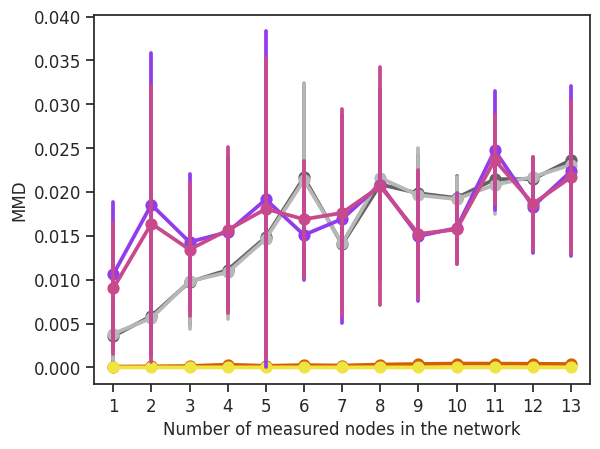

/tmp/ipykernel_3450975/3772577673.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(f"/dccstor/ipc1/CAR/BFN/Figures/Measured_nodes_EMD_per_n_measured.pdf", bbox_inches="tight")
/tmp/ipykernel_3450975/3772577673.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(f"/dccstor/ipc1/CAR/BFN/Figures/Measured_nodes_EMD_per_n_measured.pdf", bbox_inches="tight")
/tmp/ipykernel_3450975/3772577673.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(f"/dccstor/ipc1/CAR/BFN/Figures/Measured_nodes_EMD_per_n_measured.pdf", b

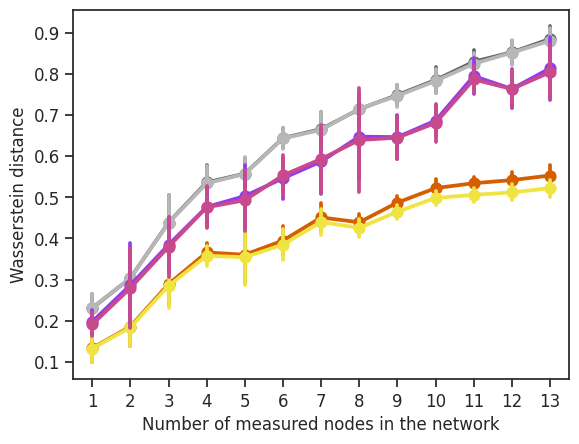

/tmp/ipykernel_3450975/3772577673.py:28: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(f"/dccstor/ipc1/CAR/BFN/Figures/Measured_nodes_MMD_student_only_per_n_measured.pdf", bbox_inches="tight")
/tmp/ipykernel_3450975/3772577673.py:28: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(f"/dccstor/ipc1/CAR/BFN/Figures/Measured_nodes_MMD_student_only_per_n_measured.pdf", bbox_inches="tight")


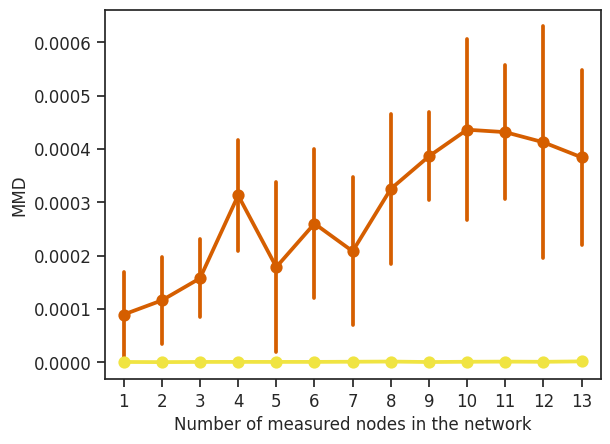

In [34]:
sns.boxplot(data=per_run_network, x="n_measured_nodes", 
            y="MMD", hue="model", palette=models_dict)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Number of measured nodes in the network")
# plt.yscale("symlog")
plt.savefig(f"/dccstor/ipc1/CAR/BFN/Figures/Measured_nodes_MMD_legend.pdf", bbox_inches="tight")
plt.show()

sns.pointplot(data=per_run_network, x="n_measured_nodes", 
            y="MMD", hue="model", palette=models_dict, errorbar="sd")
plt.legend([], [], frameon=False)
plt.xlabel("Number of measured nodes in the network")
plt.savefig(f"/dccstor/ipc1/CAR/BFN/Figures/Measured_nodes_MMD_per_n_measured.pdf", bbox_inches="tight")
plt.show()

sns.pointplot(data=per_run_network, x="n_measured_nodes", 
            y="EMD", hue="model", palette=models_dict, errorbar="sd")
plt.legend([], [], frameon=False)
plt.xlabel("Number of measured nodes in the network")
plt.ylabel("Wasserstein distance")
plt.savefig(f"/dccstor/ipc1/CAR/BFN/Figures/Measured_nodes_EMD_per_n_measured.pdf", bbox_inches="tight")
plt.show()

sns.pointplot(data=per_run_network[per_run_network["model"].isin(["student_same_input", "student_random_input"])], x="n_measured_nodes", 
            y="MMD", hue="model", palette=models_dict, errorbar="sd")
plt.legend([], [], frameon=False)
plt.xlabel("Number of measured nodes in the network")
plt.savefig(f"/dccstor/ipc1/CAR/BFN/Figures/Measured_nodes_MMD_student_only_per_n_measured.pdf", bbox_inches="tight")
plt.show()